# Testing PyPI `mat_discover` with GPU

If you don't have access to a GPU, but would still like to use the faster capabilities associated with the GPU-functionality of `mat_discover`, you can use the GPU hardware provided by Google Colab (see "Setup"). This notebook is an example of installing `mat_discover` via `pip` on Google Colab and basic usage. There is a [corresponding notebook](https://colab.research.google.com/drive/1jso3z23doKMv73wL9Z8Y3Xv_eKPmOcSo?usp=sharing) for installing `mat_discover` via `conda`. Installation via `conda` is easy on a local machine; however, it's more involved on Google Colab.

The shared link for this notebook allows for adding comments. Feel free to add comments to this notebook! You can get rid of the comments sidebar via "View" --> "Comments sidebar"

> ⚠ **WARNING** Training on large datasets is slow on a CPU. To run faster on a larger dataset, please enable GPU on Google Colab by navigating to `Edit --> Notebook Settings --> Hardware Accelerator`. Then select `GPU` from the dropdown menu.

## Setup

`torch` is available by default in Google Colab, so we will not need to install PyTorch. Now we will make sure `pip` is upgraded to the latest version and install `mat_discover`.

> ⚠ **WARNING** You must restart the runtime via `Runtime -> Restart runtime` after this command or by clicking the button that appears below, otherwise `mat_discover` will likely fail (specific to Google Colab)

In [ ]:
%%time
import torch
print(f"torch version: {torch.__version__}")
!pip install -U pip
try:
  import mat_discover
except:
  !pip install -UI mat_discover
# **You must restart the runtime after this step**

torch version: 1.10.0+cu111
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 24.8 MB/s eta 0:00:00
    

In [ ]:
import pandas as pd
import mat_discover
print(mat_discover.__version__)
from mat_discover.mat_discover_ import Discover

2.2.1


In [ ]:
disc = Discover(hdbscan_kwargs=dict(min_samples=1, min_cluster_size=5), use_plotly_offline=False)

## Train Discover

In [ ]:
from crabnet.data.materials_data import elasticity
dummy = True # runs on a subset of data, set to False (and recommended to use a GPU) for the full elasticity dataset
train_df, val_df = disc.data(elasticity, dummy=dummy)

In [ ]:
disc.fit(train_df)


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 64/64 [00:00<00:00, 108414.97formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 16/16 [00:00<00:00, 43156.83formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 20.1 val mae: 23.8
Epoch: 19/300 --- train mae: 16.4 val mae: 21.2
Epoch: 39/300 --- train mae: 13.3 val mae: 19.2
Epoch: 59/300 --- train mae: 11.7 val mae: 18.9
Epoch 79 failed to improve.
Discarded: 1/3 weight updates
Epoch: 79/300 --- train mae: 10.4 val mae: 19.5
Epoch 99 failed to improve.
Discarded: 2/3 weight updates
Epoch: 99/300 --- train mae: 11.3 val mae: 20.9
Epoch 119 failed to improve.
Discarded: 3/3 weight updates
Epoch: 119/300 --- train mae: 9.88 val mae: 19.8
Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth
[train-CrabNet]
Elapsed: 13.00307



In [ ]:
scores = disc.predict(val_df)

Generating EDM: 100%|██████████| 80/80 [00:00<00:00, 37549.72formulae/s]

loading data with up to 4 elements in the formula



Generating EDM: 100%|██████████| 20/20 [00:00<00:00, 23471.20formulae/s]


loading data with up to 4 elements in the formula
val RMSE:  24.02583198834105
Fitting mod_petti kernel matrix
Constructing distances
[fit-wasserstein]
Elapsed: 7.66355



/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



[fit-UMAP]
Elapsed: 45.23818



/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



[fit-vis-UMAP]
Elapsed: 7.80609

[DensMAP]
Elapsed: 53.04462

[HDBSCAN*]
Elapsed: 0.00467

[pdf-summation]
Elapsed: 0.13404

[gridded-pdf-summation]
Elapsed: 0.13826

[train-val-pdf-summation]
Elapsed: 0.0382

[nearest-neighbor-properties]
Elapsed: 0.00527



In [ ]:
# this cell is optional
cat_df = pd.concat((train_df, val_df), axis=0)
disc.group_cross_val(cat_df, umap_random_state=42)
print("scaled test error = ", disc.scaled_error)

Fitting mod_petti kernel matrix
Constructing distances
[fit-wasserstein]
Elapsed: 6.44094



/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



[fit-UMAP]
Elapsed: 3.42016

[HDBSCAN*]
Elapsed: 0.00604

Number of iterations (i.e. clusters):  8
[Iteration:  0 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 73/73 [00:00<00:00, 65606.21formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 19/19 [00:00<00:00, 38093.58formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 22.6 val mae: 19.2
Epoch: 19/300 --- train mae: 20.4 val mae: 14.3
Epoch: 39/300 --- train mae: 16.7 val mae: 11.3
Epoch: 59/300 --- train mae: 14.1 val mae: 11
Epoch: 79/300 --- train mae: 12.6 val mae: 10.7
Epoch 99 failed to improve.
Discarded: 1/3 weight updates
Epoch: 99/300 --- train mae: 11.2 val mae: 11.2
Epoch: 119/300 --- train mae: 11.3 val mae: 10.5
Epoch 139 failed to improve.
Discarded: 2/3 weight updates
Epoch: 139/300 --- train mae: 10.2 val mae: 12.8
Epoch: 159/300 --- train mae: 11.2 val mae: 9.82
Epoch 179 failed to improve.
Discarded: 3/3 weight updates
Epoch: 179/300 --- train mae: 9.53 val mae: 12
Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


Generating EDM: 100%|██████████| 92/92 [00:00<00:00, 50257.35formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 8/8 [00:00<00:00, 26358.55formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  1 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 74/74 [00:00<00:00, 51472.39formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 19/19 [00:00<00:00, 68937.52formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 21.9 val mae: 18.9
Epoch: 19/300 --- train mae: 19.4 val mae: 16.3
Epoch: 39/300 --- train mae: 15.9 val mae: 15.9
Epoch: 59/300 --- train mae: 14.2 val mae: 15.3
Epoch: 79/300 --- train mae: 13.1 val mae: 14.6
Epoch: 99/300 --- train mae: 12.5 val mae: 14.1
Epoch: 119/300 --- train mae: 11.9 val mae: 13.9
Epoch: 139/300 --- train mae: 11.9 val mae: 13.6
Epoch 159 failed to improve.
Discarded: 1/3 weight updates
Epoch: 159/300 --- train mae: 11.5 val mae: 13.9
Epoch: 179/300 --- train mae: 11.2 val mae: 13.3
Epoch: 199/300 --- train mae: 11 val mae: 12.6
Epoch 219 failed to improve.
Discarded: 2/3 weight updates
Epoch: 219/300 --- train mae: 11 val mae: 12.8
Epoch: 239/300 --- train mae: 10.4 val mae: 11.9
Epoch: 259/300 --- train mae: 10 val mae: 11.9
E

Generating EDM: 100%|██████████| 93/93 [00:00<00:00, 24778.95formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 7/7 [00:00<00:00, 24244.53formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  2 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 75/75 [00:00<00:00, 47705.91formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 19/19 [00:00<00:00, 60740.68formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 16.9 val mae: 24.2
Epoch: 19/300 --- train mae: 14.6 val mae: 22.6
Epoch: 39/300 --- train mae: 10.7 val mae: 18.7
Epoch: 59/300 --- train mae: 9.34 val mae: 16.5
Epoch: 79/300 --- train mae: 8.65 val mae: 16.4
Epoch: 99/300 --- train mae: 7.77 val mae: 14.8
Epoch: 119/300 --- train mae: 7.47 val mae: 14.4
Epoch: 139/300 --- train mae: 7.35 val mae: 14.5
Epoch: 159/300 --- train mae: 7.11 val mae: 13.6
Epoch 179 failed to improve.
Discarded: 1/3 weight updates
Epoch: 179/300 --- train mae: 7.09 val mae: 14.3
Epoch: 199/300 --- train mae: 6.61 val mae: 13.4
Epoch 219 failed to improve.
Discarded: 2/3 weight updates
Epoch: 219/300 --- train mae: 6.46 val mae: 13.8
Epoch: 239/300 --- train mae: 6.3 val mae: 13.4
Epoch: 259/300 --- train mae: 5.71 val mae: 1

Generating EDM: 100%|██████████| 94/94 [00:00<00:00, 60646.76formulae/s]

loading data with up to 4 elements in the formula



Generating EDM: 100%|██████████| 6/6 [00:00<00:00, 38304.15formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  3 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 72/72 [00:00<00:00, 56436.16formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 18/18 [00:00<00:00, 38637.40formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 20.7 val mae: 20.3
Epoch: 19/300 --- train mae: 18 val mae: 18.1
Epoch: 39/300 --- train mae: 14.2 val mae: 14.2
Epoch: 59/300 --- train mae: 12.4 val mae: 12.9
Epoch 79 failed to improve.
Discarded: 1/3 weight updates
Epoch: 79/300 --- train mae: 11.2 val mae: 14.2
Epoch 99 failed to improve.
Discarded: 2/3 weight updates
Epoch: 99/300 --- train mae: 10.8 val mae: 16.6
Epoch 119 failed to improve.
Discarded: 3/3 weight updates
Epoch: 119/300 --- train mae: 10.2 val mae: 16.2
Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


Generating EDM: 100%|██████████| 90/90 [00:00<00:00, 37286.38formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 10/10 [00:00<00:00, 30283.78formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  4 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 64/64 [00:00<00:00, 85680.01formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 16/16 [00:00<00:00, 36751.84formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 23.1 val mae: 21.6
Epoch: 19/300 --- train mae: 20.3 val mae: 17.8
Epoch: 39/300 --- train mae: 16.6 val mae: 13.7
Epoch: 59/300 --- train mae: 14.2 val mae: 12.3
Epoch 79 failed to improve.
Discarded: 1/3 weight updates
Epoch: 79/300 --- train mae: 13.6 val mae: 12.7
Epoch: 99/300 --- train mae: 12.5 val mae: 11.9
Epoch: 119/300 --- train mae: 12.5 val mae: 11.9
Epoch: 139/300 --- train mae: 11.4 val mae: 11.6
Epoch: 159/300 --- train mae: 11.1 val mae: 11.1
Epoch 179 failed to improve.
Discarded: 2/3 weight updates
Epoch: 179/300 --- train mae: 10.6 val mae: 11.5
Epoch: 199/300 --- train mae: 10.2 val mae: 11.1
Epoch: 219/300 --- train mae: 10.4 val mae: 10.7
Epoch 239 failed to improve.
Discarded: 3/3 weight updates
Epoch: 239/300 --- train mae: 10.2 

Generating EDM: 100%|██████████| 80/80 [00:00<00:00, 58784.92formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 20/20 [00:00<00:00, 34879.87formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  5 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 75/75 [00:00<00:00, 102500.10formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 19/19 [00:00<00:00, 29581.21formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 21.1 val mae: 23.3
Epoch: 19/300 --- train mae: 18 val mae: 21.1
Epoch: 39/300 --- train mae: 13.9 val mae: 21.1
Epoch: 59/300 --- train mae: 12.4 val mae: 19.9
Epoch: 79/300 --- train mae: 11.9 val mae: 19.3
Epoch: 99/300 --- train mae: 11.7 val mae: 18.3
Epoch: 119/300 --- train mae: 11 val mae: 17.4
Epoch: 139/300 --- train mae: 10.3 val mae: 16.5
Epoch: 159/300 --- train mae: 10 val mae: 16.4
Epoch 179 failed to improve.
Discarded: 1/3 weight updates
Epoch: 179/300 --- train mae: 9.57 val mae: 16.7
Epoch: 199/300 --- train mae: 9.75 val mae: 16.6
Epoch 219 failed to improve.
Discarded: 2/3 weight updates
Epoch: 219/300 --- train mae: 9.36 val mae: 18.3
Epoch 239 failed to improve.
Discarded: 3/3 weight updates
Epoch: 239/300 --- train mae: 8.67 val m

Generating EDM: 100%|██████████| 94/94 [00:00<00:00, 58470.20formulae/s]

loading data with up to 4 elements in the formula



Generating EDM: 100%|██████████| 6/6 [00:00<00:00, 30954.27formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  6 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 68/68 [00:00<00:00, 89408.36formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 17/17 [00:00<00:00, 49516.09formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 22.7 val mae: 24.1
Epoch: 19/300 --- train mae: 20 val mae: 20.6
Epoch: 39/300 --- train mae: 15.3 val mae: 16.9
Epoch: 59/300 --- train mae: 12.8 val mae: 14.8
Epoch: 79/300 --- train mae: 11.8 val mae: 14
Epoch: 99/300 --- train mae: 11 val mae: 13.6
Epoch: 119/300 --- train mae: 11 val mae: 13.2
Epoch: 139/300 --- train mae: 10.2 val mae: 13
Epoch: 159/300 --- train mae: 9.76 val mae: 13
Epoch: 179/300 --- train mae: 9.48 val mae: 12.7
Epoch 199 failed to improve.
Discarded: 1/3 weight updates
Epoch: 199/300 --- train mae: 8.89 val mae: 13
Epoch 219 failed to improve.
Discarded: 2/3 weight updates
Epoch: 219/300 --- train mae: 8.49 val mae: 13.2
Epoch 239 failed to improve.
Discarded: 3/3 weight updates
Epoch: 239/300 --- train mae: 8.3 val mae: 13.7


Generating EDM: 100%|██████████| 85/85 [00:00<00:00, 99225.12formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 15/15 [00:00<00:00, 13635.58formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  7 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 71/71 [00:00<00:00, 71706.14formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 18/18 [00:00<00:00, 40416.21formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 18.9 val mae: 28.4
Epoch: 19/300 --- train mae: 16.4 val mae: 30.4
Epoch: 39/300 --- train mae: 12.9 val mae: 25.6
Epoch: 59/300 --- train mae: 11.3 val mae: 22.8
Epoch: 79/300 --- train mae: 10 val mae: 21.9
Epoch 99 failed to improve.
Discarded: 1/3 weight updates
Epoch: 99/300 --- train mae: 9.03 val mae: 22.5
Epoch 119 failed to improve.
Discarded: 2/3 weight updates
Epoch: 119/300 --- train mae: 8.42 val mae: 23.9
Epoch 139 failed to improve.
Discarded: 3/3 weight updates
Epoch: 139/300 --- train mae: 7.93 val mae: 22.4
Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


Generating EDM: 100%|██████████| 89/89 [00:00<00:00, 56201.91formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 11/11 [00:00<00:00, 32837.97formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  8 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 74/74 [00:00<00:00, 59323.11formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 19/19 [00:00<00:00, 39490.47formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 19.3 val mae: 22.5
Epoch: 19/300 --- train mae: 17.2 val mae: 21.6
Epoch: 39/300 --- train mae: 14.4 val mae: 19.6
Epoch: 59/300 --- train mae: 13 val mae: 18.2
Epoch: 79/300 --- train mae: 11.1 val mae: 15.3
Epoch: 99/300 --- train mae: 9.96 val mae: 13.7
Epoch: 119/300 --- train mae: 9.22 val mae: 12.3
Epoch: 139/300 --- train mae: 8.45 val mae: 11.2
Epoch: 159/300 --- train mae: 8.15 val mae: 10.9
Epoch: 179/300 --- train mae: 8.08 val mae: 10.8
Epoch: 199/300 --- train mae: 7.75 val mae: 10.4
Epoch: 219/300 --- train mae: 7.78 val mae: 9.92
Epoch 239 failed to improve.
Discarded: 1/3 weight updates
Epoch: 239/300 --- train mae: 7.58 val mae: 10.6
Epoch: 259/300 --- train mae: 7.39 val mae: 9.94
Epoch: 279/300 --- train mae: 6.67 val mae: 8.93
Epoch 2

Generating EDM: 100%|██████████| 93/93 [00:00<00:00, 59471.00formulae/s]

loading data with up to 4 elements in the formula



Generating EDM: 100%|██████████| 7/7 [00:00<00:00, 35416.32formulae/s]


loading data with up to 4 elements in the formula
[Iteration:  9 ]

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 0 parameters



Generating EDM: 100%|██████████| 72/72 [00:00<00:00, 56100.67formulae/s]


loading data with up to 4 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 18/18 [00:00<00:00, 37319.56formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 19 val mae: 28.7
Epoch: 19/300 --- train mae: 16.4 val mae: 26.5
Epoch: 39/300 --- train mae: 12.2 val mae: 23.2
Epoch: 59/300 --- train mae: 10.5 val mae: 23
Epoch 79 failed to improve.
Discarded: 1/3 weight updates
Epoch: 79/300 --- train mae: 9.6 val mae: 24.5
Epoch 99 failed to improve.
Discarded: 2/3 weight updates
Epoch: 99/300 --- train mae: 9.08 val mae: 25.3
Epoch 119 failed to improve.
Discarded: 3/3 weight updates
Epoch: 119/300 --- train mae: 8.46 val mae: 25.9
Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


Generating EDM: 100%|██████████| 90/90 [00:00<00:00, 41564.34formulae/s]


loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 10/10 [00:00<00:00, 34952.53formulae/s]

loading data with up to 4 elements in the formula
Weighted group cross validation error:  0.5007914297486284
Weighted group cross validation scaled error:  0.8160623350325352
scaled test error =  0.8160623350325352


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




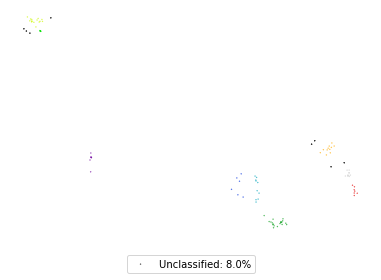

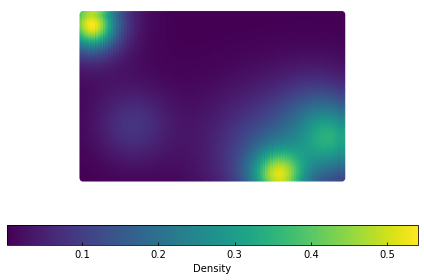

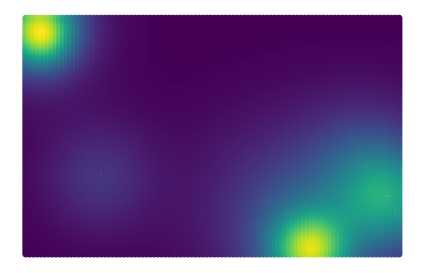

In [ ]:
disc.plot()

In [ ]:
disc.dens_score_df.head(10)

,formula,prediction,density,score,index
90,Ag3P11,68.249908,0.152155,0.766659,90
70,Ag2CO3,70.506271,0.161554,0.680413,70
76,Ag2MoO4,72.738258,0.166697,0.665078,76
83,Ag2SeO3,65.048828,0.160325,0.526705,83
77,Ag2O,75.087906,0.184579,0.438881,77
73,Ag2HgI4,60.766151,0.164008,0.327791,73
45,AcI3,43.463760,0.136160,0.244041,45
0,Ac,35.121315,0.126285,0.143819,0
4,Ac2CuIr,66.051277,0.190612,0.048444,4
31,AcBr3,34.537712,0.132987,0.012242,31


In [ ]:
disc.peak_score_df.head(10)

,formula,prediction,density,score,index
30,AcAu3,64.459831,0.215798,1.022355,30
77,Ag2O,75.087906,0.184579,0.972298,77
45,AcI3,43.463760,0.136160,0.791634,45
76,Ag2MoO4,72.738258,0.166697,0.740044,76
70,Ag2CO3,70.506271,0.161554,0.504963,70
4,Ac2CuIr,66.051277,0.190612,0.294133,4
12,Ac2NiIr,65.560181,0.193282,0.219202,12
90,Ag3P11,68.249908,0.152155,0.163193,90
39,AcGa3,40.886024,0.224287,0.032117,39
53,AcMgTl2,40.417099,0.225347,0.007518,53


You can see what other built-in data is available by default via:

In [ ]:
from pkgutil import iter_modules # https://stackoverflow.com/a/58684066/13697228
from crabnet import data

import sys
from setuptools import find_packages
from pkgutil import iter_modules

def find_modules(path):
    """Find modules recursively. https://stackoverflow.com/a/54323162/13697228"""
    modules = set()
    for pkg in find_packages(path):
        modules.add(pkg)
        pkgpath = path + '/' + pkg.replace('.', '/')
        if sys.version_info.major == 2 or (sys.version_info.major == 3 and sys.version_info.minor < 6):
            for _, name, ispkg in iter_modules([pkgpath]):
                if not ispkg:
                    modules.add(pkg + '.' + name)
        else:
            for info in iter_modules([pkgpath]):
                if not info.ispkg:
                    modules.add(pkg + '.' + info.name)
    return modules

find_modules(data.__path__[0])

{'benchmark_data',
 'benchmark_data.CritExam__Ed',
 'benchmark_data.CritExam__Ef',
 'benchmark_data.OQMD_Bandgap',
 'benchmark_data.OQMD_Energy_per_atom',
 'benchmark_data.OQMD_Formation_Enthalpy',
 'benchmark_data.OQMD_Volume_per_atom',
 'benchmark_data.aflow__Egap',
 'benchmark_data.aflow__ael_bulk_modulus_vrh',
 'benchmark_data.aflow__ael_debye_temperature',
 'benchmark_data.aflow__ael_shear_modulus_vrh',
 'benchmark_data.aflow__agl_thermal_conductivity_300K',
 'benchmark_data.aflow__agl_thermal_expansion_300K',
 'benchmark_data.aflow__energy_atom',
 'benchmark_data.mp_bulk_modulus',
 'benchmark_data.mp_e_hull',
 'benchmark_data.mp_elastic_anisotropy',
 'benchmark_data.mp_mu_b',
 'benchmark_data.mp_shear_modulus',
 'element_properties',
 'matbench',
 'materials_data',
 'materials_data.elasticity',
 'materials_data.example_materials_property'}